### Custom data generator for loading video data for action recognition

In [37]:
import pandas as pd
import cv2
import numpy as np
from sklearn.utils import shuffle
import os
from collections import deque
import copy
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import np_utils
from config import Config
%matplotlib inline  

#### A helper function for loading the samples in the format of
[[[frame1_filename,frame2_filename,…],label1], [[frame1_filename,frame2_filename,…],label2],……….]

In [38]:
# reading the video files from the csv file
def file_generator(data_path,data_files,temporal_stride=1,temporal_length=16):
    '''
    data_files - list of csv files to be read.
    '''
    for f in data_files: # read all the csv files (one csv file corresponds to one vdieo) in data_files one by one
        tmp_df = pd.read_csv(os.path.join(data_path,f))
        label_list = list(tmp_df['Label'])  # Load all the labels in the label_list
        total_images = len(label_list) 
        if total_images>=temporal_length: # only if the number of frames in the video is greater tha temporal length, use that video
            num_samples = int((total_images-temporal_length)/temporal_stride)+1
            print ('num of samples from vid seq-{}: {}'.format(f,num_samples))
            img_list = list(tmp_df['FileName'])
        else: # if the number of frames are less than temporal length , discard it
            print ('num of frames is less than temporal length; hence discarding this file-{}'.format(f))
            continue

        start_frame = 0
        samples = deque() # initliaze a queue to store the frames 
        samp_count=0 # a counter to count the number of smaple. one smaple has as many frames as defined by temporal length
        for img in img_list:
            samples.append(img)
            if len(samples)==temporal_length: #if the queue has as many frames as temporal length, return it as one sample
                samples_c=copy.deepcopy(samples) # copy the queue as in the next stage frames would be popped
                samp_count+=1
                for t in range(temporal_stride): # pop out as many frames as described by the stride from the left to accomodate new frames
                    samples.popleft()
                yield samples_c,label_list[0] # return a sample(consisting of as many frames as defined by temporal length) 
                                                # and its corsponding label

#### A load function for loading the samples in the format of
[[[frame1_filename,frame2_filename,…],label1], [[frame1_filename,frame2_filename,…],label2],……….]

In [39]:
# Load the samples and their corresponding label for each video
def load_samples(data_cat='train',temporal_stride=1,temporal_length=16):
    data_path = os.path.join('data_files',data_cat)
    data_files = os.listdir(data_path)
    # define a generator to read the samples
    file_gen = file_generator(data_path,data_files,temporal_stride,temporal_length)
    iterator = True
    data_list = []
    while iterator:
        try:
            x,y = next(file_gen)
            x=list(x)
            data_list.append([x,y])
        except Exception as e:
            print ('the exception: ',e)
            iterator = False
            print ('end of data generator')
    return data_list


#### load the train data

In [40]:
train_data = load_samples(data_cat='train',temporal_stride=4,temporal_length=16)

num of samples from vid seq-Archery_v_Archery_g01_c01.csv: 29
num of samples from vid seq-Archery_v_Archery_g01_c02.csv: 32
num of samples from vid seq-Archery_v_Archery_g01_c03.csv: 36
num of samples from vid seq-Archery_v_Archery_g01_c04.csv: 28
num of samples from vid seq-Archery_v_Archery_g01_c05.csv: 30
num of samples from vid seq-Archery_v_Archery_g01_c06.csv: 24
num of samples from vid seq-Archery_v_Archery_g01_c07.csv: 32
num of samples from vid seq-Archery_v_Archery_g02_c01.csv: 36
num of samples from vid seq-Archery_v_Archery_g02_c02.csv: 37
num of samples from vid seq-Archery_v_Archery_g02_c03.csv: 31
num of samples from vid seq-Archery_v_Archery_g02_c04.csv: 24
num of samples from vid seq-Archery_v_Archery_g02_c05.csv: 28
num of samples from vid seq-Archery_v_Archery_g02_c06.csv: 25
num of samples from vid seq-Archery_v_Archery_g02_c07.csv: 38
num of samples from vid seq-Archery_v_Archery_g03_c01.csv: 34
num of samples from vid seq-Archery_v_Archery_g03_c02.csv: 41
num of s

num of samples from vid seq-Basketball_v_Basketball_g07_c02.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g07_c03.csv: 34
num of samples from vid seq-Basketball_v_Basketball_g07_c04.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g08_c01.csv: 39
num of samples from vid seq-Basketball_v_Basketball_g08_c02.csv: 18
num of samples from vid seq-Basketball_v_Basketball_g08_c03.csv: 21
num of samples from vid seq-Basketball_v_Basketball_g08_c04.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g09_c01.csv: 24
num of samples from vid seq-Basketball_v_Basketball_g09_c02.csv: 23
num of samples from vid seq-Basketball_v_Basketball_g09_c03.csv: 18
num of samples from vid seq-Basketball_v_Basketball_g09_c04.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g09_c05.csv: 27
num of samples from vid seq-Basketball_v_Basketball_g10_c01.csv: 29
num of samples from vid seq-Basketball_v_Basketball_g10_c02.csv: 28
num of samples from vid seq-Basketball_v_Basketb

num of samples from vid seq-Biking_v_Biking_g03_c02.csv: 92
num of samples from vid seq-Biking_v_Biking_g03_c03.csv: 86
num of samples from vid seq-Biking_v_Biking_g03_c04.csv: 91
num of samples from vid seq-Biking_v_Biking_g04_c01.csv: 57
num of samples from vid seq-Biking_v_Biking_g04_c02.csv: 42
num of samples from vid seq-Biking_v_Biking_g04_c03.csv: 57
num of samples from vid seq-Biking_v_Biking_g04_c04.csv: 51
num of samples from vid seq-Biking_v_Biking_g04_c05.csv: 50
num of samples from vid seq-Biking_v_Biking_g05_c01.csv: 72
num of samples from vid seq-Biking_v_Biking_g05_c02.csv: 47
num of samples from vid seq-Biking_v_Biking_g05_c03.csv: 47
num of samples from vid seq-Biking_v_Biking_g05_c04.csv: 47
num of samples from vid seq-Biking_v_Biking_g05_c05.csv: 37
num of samples from vid seq-Biking_v_Biking_g05_c06.csv: 42
num of samples from vid seq-Biking_v_Biking_g05_c07.csv: 42
num of samples from vid seq-Biking_v_Biking_g06_c01.csv: 22
num of samples from vid seq-Biking_v_Bik

In [41]:
print ('Total number of train samples:',len(train_data))

Total number of train samples: 12277


In [42]:
train_data[0]

[['activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000000.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000001.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000002.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000003.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000004.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000005.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000006.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000007.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000008.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000009.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000010.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000011.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000012.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000013.png',
  'activity_data\\tr

In [43]:
train_data[5000:5002]

[[['activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000000.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000001.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000002.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000003.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000004.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000005.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000006.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000007.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000008.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000009.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000010.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000011.png',
   'activity_data\\train\\Basketball\\v_Basketball_g08_c03\\img_000012.png',

#### Load the test data

In [44]:
test_data = load_samples(data_cat='test',temporal_stride=4)

num of samples from vid seq-Archery_v_Archery_g18_c03.csv: 46
num of samples from vid seq-Archery_v_Archery_g18_c04.csv: 39
num of samples from vid seq-Archery_v_Archery_g18_c05.csv: 35
num of samples from vid seq-Archery_v_Archery_g18_c06.csv: 37
num of samples from vid seq-Archery_v_Archery_g18_c07.csv: 32
num of samples from vid seq-Archery_v_Archery_g19_c01.csv: 29
num of samples from vid seq-Archery_v_Archery_g19_c02.csv: 19
num of samples from vid seq-Archery_v_Archery_g19_c03.csv: 36
num of samples from vid seq-Archery_v_Archery_g19_c04.csv: 20
num of samples from vid seq-Archery_v_Archery_g20_c01.csv: 19
num of samples from vid seq-Archery_v_Archery_g20_c02.csv: 18
num of samples from vid seq-Archery_v_Archery_g20_c03.csv: 20
num of samples from vid seq-Archery_v_Archery_g20_c04.csv: 21
num of samples from vid seq-Archery_v_Archery_g20_c05.csv: 27
num of samples from vid seq-Archery_v_Archery_g20_c06.csv: 26
num of samples from vid seq-Archery_v_Archery_g20_c07.csv: 21
num of s

In [45]:
len(test_data)

4472

#### Shuffle the dataset

In [46]:
def shuffle_data(samples):
    data = shuffle(samples,random_state=2)
    return data

In [47]:
def preprocess_image(img):
    img = cv2.resize(img,(224,224))
    img = img/255
    return img

In [20]:
def data_generator(data,batch_size=10,temporal_padding='same',shuffle=True):              
    """
    Yields the next training batch.
    data is an array [[img1_filename,img2_filename...,img16_filename],label1], [image2_filename,label2],...].
    """
    num_samples = len(data)
    if shuffle:
        data = shuffle_data(data)
    while True:   
        for offset in range(0, num_samples, batch_size):
            print ('startring index: ', offset) 
            # Get the samples you'll use in this batch
            batch_samples = data[offset:offset+batch_size]
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            # For each example
            for batch_sample in batch_samples: # Loop over every batch
                # Load image (X)
                x = batch_sample[0]
                y = batch_sample[1]
                temp_data_list = []
                for img in x:
                    try:
                        img = cv2.imread(img)
                        #apply any kind of preprocessing here
                        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                        img = preprocess_image(img)
                        temp_data_list.append(img)

                    except Exception as e:
                        print (e)
                        print ('error reading file: ',img)                      
                # Read label (y)
                #label = label_names[y]
                # Add example to arrays
                X_train.append(temp_data_list)
                y_train.append(y)
    
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            #X_train = np.rollaxis(X_train,1,4)
            y_train = np.array(y_train)
            # convert to one hot encoding for training keras model
            y_train = np_utils.to_categorical(y_train, 3)
    
            # yield the next training batch            
            yield X_train, y_train

#### create a generator object with training data

In [48]:
train_generator = data_generator(train_data,batch_size=4,shuffle=True)
    

In [49]:
x,y = next(train_generator)
print ('x shape: ',x.shape)
print ('y shape: ',y.shape)

startring index:  0
x shape:  (4, 16, 224, 224, 3)
y shape:  (4, 3)


In [50]:
y


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

#### Let's visualize the first sample

In [51]:
x_0=x[2]
y_0=y[2]
print('x_0 shape: ',x_0.shape)
print('y_0 shape: ',y_0.shape)

x_0 shape:  (16, 224, 224, 3)
y_0 shape:  (3,)


In [52]:
Config.labels_to_class

{0: 'Archery', 1: 'Basketball', 2: 'Biking'}

In [53]:
activity = Config.labels_to_class[np.argmax(y_0)]
activity

'Archery'

#### Plot the first sample

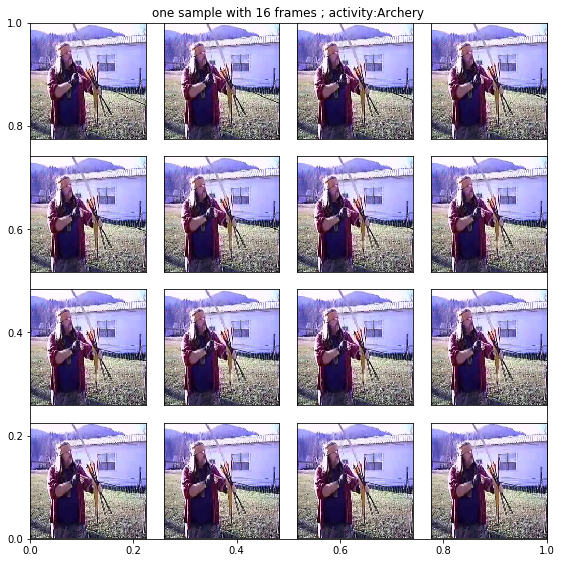

In [54]:
num_of_images=16
fig=plt.figure(figsize=(8,8))	
plt.title("one sample with {} frames ; activity:{}".format(num_of_images,activity))
subplot_num = int(np.ceil(np.sqrt(num_of_images)))
for i in range(int(num_of_images)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(x_0[i,:,:,::-1])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
